# Corn Grain Yield Response to Nitrogen Rates
---

**Name**: Adrian Correndo

**Semester**: Spring 2019

**Project area**: Agronomy

## **Table of contents**
1. [DESCRIPTION](#description)

2. [EXAMPLE](#example)

3. [CODE:](#Code)
    a. [Modules and data](#modules_datafile)
    b. [Sorting by](#Sort)
    c. [Grouping by TRIAL](#Group)
    d. [Grain yield of non-fertilized plots](#Y0)
    e. [Maximum grain yield](#Ymax)
    f. [Maximum yield response to N](#NRmax)
    g. [Nitrogen response](#NR)
    h. [Nitrogen agronomic efficiency](#NAE)
    i. [Non-fertilized plots](#N0_plots)
    j. [Fertilized plots](#Nf_plots)
    
4. [OUTPUTS:](#OUTPUTS)
    a. [N0 plots](#N0_file)
    b. [Nf plots](#Nf_file)
    
5. [SOIL TEXTURE:](#STx)
    a. [Classes and Frequencies](#STx_freq)
    b. [Grouping by Soil texture](#GSTx)
    c. [Descriptive Stats by STx groups](#Stats)

<a name="description"></a>
## **1. DESCRIPTION**
## Objective

Automating the calculation of grain yield (GY) response to different rates of nitrogen (N) fertilizer, and related fertilizer use efficiencies (NAE) in a database of more than one thousand experiments with different designs. A secondary goal is to explore descriptive statistics of variables of interest grouping experiments by soil texture classes (STx).

## Inputs

*.csv file with 4 columns: TRIAL, STx, N rate, and GY, where:

**-TRIAL**: Experiment ID number;
**-STx**: Soil texture class of typical pedon  (Soil Survey Staff, 2018);
**-Nrate**: Nitrogen rate (kg N / ha);
**-GY**: Grain Yield when Nrate=0  (Mg / ha, 15.5% moisture);

## Outcomes

Two "*.csv" files

1. N0_plots.csv, with the following columns: TRIAL, STx, Y0, Ymax, NRmax, NRmax_r, NAEmax.
2. Nf_plots.csv, with the following columns: TRIAL, STx, Nrate, GY, Y0, Ymax, NR, NRr and NAE, where:

**-Y0**: GY when Nrate=0  (Mg / ha);
**-Ymax**: maximum observed GY (Mg / ha);
**-NR**: absolute nitrogen response corresponding to each fertilizer rate different from 0  (Mg / ha).
**-NRr**: relative nitrogen response corresponding to each fertilizer rate different from 0  (%).
**-NRmax**: maximum absolute nitrogen response (Mg / ha).
**-NRmax_r**: maximum relative nitrogen response (%).
**-NAE**: nitrogen agronomic efficiency as NR divided by its corresponding Nrate (kg NR / kg applied N).

Challenges might be related to: 

i) the # of Nrate levels and the ammount of applied N (kg) vary across trials;
ii) Y0 and Ymax values take place at **Trial** level, while the NR and NAE values, at a sub-level by a given **Trial-Nrate combination**.

## Rationale

Database compund by hundreds of corn nitrogen fertilizer experiments. Automating these calculations will save me a significant amount of time and avoid potential misscalculations when processing the data.

<a name="example"></a>
## **2. EXAMPLE**

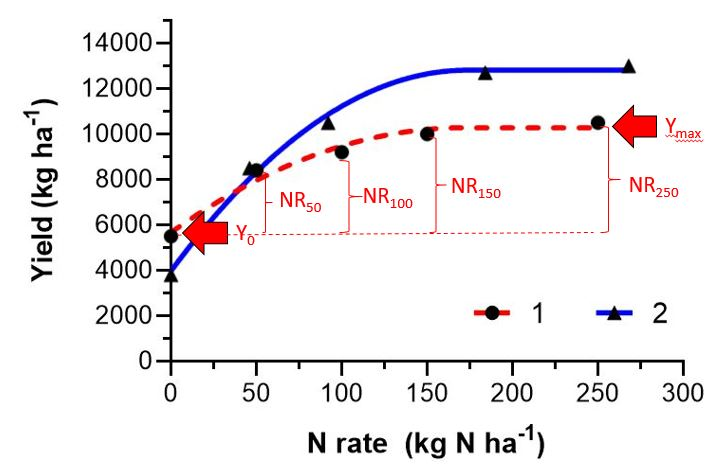

In [140]:
from IPython.display import Image
Image(filename='C:/Users/correndo/Desktop/Coding/project/Scatter.JPG')

**Fig. 1**. Scatter plot of Corn Grain Yield (kg/ha) and nitrogen rate (kg N/ha) from two typical corn nitogren experiments from the database (#1: circles, #2: triangles). Y0, Ymax and NR variables are shown for Trial 1. *Fitted functions correspond to quadratic-plateau models (y = a + bx +cx^2, when Nrate < Xc -critical value or threshold-; otherwise y = plateau)*.

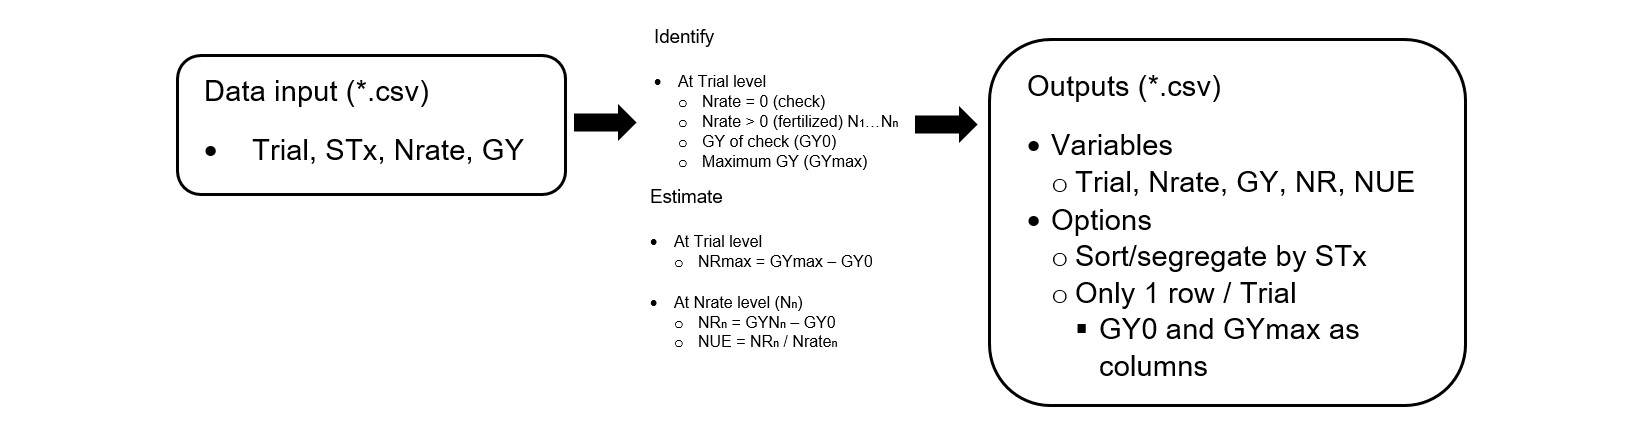

In [141]:
from IPython.display import Image
Image(filename='C:/Users/correndo/Desktop/Coding/project/sketch.jpg')

**Fig. 2**. Main steps of the project from data input to outpouts.

<a name="Code"></a>
## **3. CODE**

<a name="modules_datafile"></a>
### 3. a. Modules and datafile

In [142]:
import pandas as pd

dirname = 'C:/Users/correndo/Desktop/Coding/project/'#Local folder
filename = 'correndo_data.csv'
data = pd.read_csv(dirname + filename, encoding='latin-1')
df = pd.DataFrame(data)
df.head()

,TRIAL,STx,Nrate,GY
0,1,silty clay loam,0.0,13.317
1,1,silty clay loam,84.0,14.434
2,1,silty clay loam,140.0,15.267
3,1,silty clay loam,196.0,15.405
4,1,silty clay loam,280.0,15.496


<a name="Sort"></a>
### 3. b. Sorting by "TRIAL" and by "Nrate"(ascending)

In [143]:
sdf = df.sort_values(['TRIAL', 'Nrate'],ascending=True) #sorted dataframe (sdf) keeping the original df
sdf = pd.DataFrame(sdf)
sdf.head()

,TRIAL,STx,Nrate,GY
0,1,silty clay loam,0.0,13.317
1,1,silty clay loam,84.0,14.434
2,1,silty clay loam,140.0,15.267
3,1,silty clay loam,196.0,15.405
4,1,silty clay loam,280.0,15.496


<a name="Group"></a>
### 3. c. Grouping by TRIAL

In [144]:
# Defining "trials" element as a group of rows corresponding to the same TRIAL
trials = sdf.groupby("TRIAL")

<a name="Y0"></a>
### 3. d. Grain yield of non-fertilized plots (Y0)

In [145]:
#Using nth function of Pandas to identify -within each trial- a row position based on Nrate value (in this case Nrate == 0)
sdf_2 = sdf.join(trials['GY'].nth(trials['Nrate']==0).rename('Y0'), 'TRIAL')
sdf_2.head()

,TRIAL,STx,Nrate,GY,Y0
0,1,silty clay loam,0.0,13.317,13.317
1,1,silty clay loam,84.0,14.434,13.317
2,1,silty clay loam,140.0,15.267,13.317
3,1,silty clay loam,196.0,15.405,13.317
4,1,silty clay loam,280.0,15.496,13.317


<a name="Ymax"></a>
### 3. e. Maximum grain yield (Ymax)

In [146]:
#Using "max" function of Pandas to identify -within each trial- the row position based on GY value (in this case GY == max)
sdf_3 = sdf_2.join(trials['GY'].max().rename('Ymax'),'TRIAL')
sdf_3.head()

,TRIAL,STx,Nrate,GY,Y0,Ymax
0,1,silty clay loam,0.0,13.317,13.317,15.496
1,1,silty clay loam,84.0,14.434,13.317,15.496
2,1,silty clay loam,140.0,15.267,13.317,15.496
3,1,silty clay loam,196.0,15.405,13.317,15.496
4,1,silty clay loam,280.0,15.496,13.317,15.496


<a name="NRmax"></a>
### 3. f. Maximum yield response to nitrogen (as Ymax - Y0; absolute and relative)

In [147]:
for i in sdf_3:
    NRmax = sdf_3.Ymax - sdf_3.Y0
    NRmax_r = ((sdf_3.Ymax - sdf_3.Y0) / sdf_3.Y0)*100
sdf_4 = sdf_3.join(NRmax.rename('NRmax'))
sdf_4 = sdf_4.join(NRmax_r.rename('NRmax_r'))
sdf_4.head()

,TRIAL,STx,Nrate,GY,Y0,Ymax,NRmax,NRmax_r
0,1,silty clay loam,0.0,13.317,13.317,15.496,2.179,16.362544
1,1,silty clay loam,84.0,14.434,13.317,15.496,2.179,16.362544
2,1,silty clay loam,140.0,15.267,13.317,15.496,2.179,16.362544
3,1,silty clay loam,196.0,15.405,13.317,15.496,2.179,16.362544
4,1,silty clay loam,280.0,15.496,13.317,15.496,2.179,16.362544


<a name="NR"></a>
### 3. g. Nitrogen response (at each rate, absolute and relative)

In [148]:
for i in sdf_4:
    NR = sdf_4.GY - sdf_4.Y0
    sdf_5 = sdf_4.join(NR.rename('NR'))
    NRr = (NR / sdf_5.Y0)*100
    sdf_5 = sdf_5.join(NRr.rename('NRr'))
        
sdf_5.head()

,TRIAL,STx,Nrate,GY,Y0,Ymax,NRmax,NRmax_r,NR,NRr
0,1,silty clay loam,0.0,13.317,13.317,15.496,2.179,16.362544,0.000,0.000000
1,1,silty clay loam,84.0,14.434,13.317,15.496,2.179,16.362544,1.117,8.387775
2,1,silty clay loam,140.0,15.267,13.317,15.496,2.179,16.362544,1.950,14.642938
3,1,silty clay loam,196.0,15.405,13.317,15.496,2.179,16.362544,2.088,15.679207
4,1,silty clay loam,280.0,15.496,13.317,15.496,2.179,16.362544,2.179,16.362544


<a name="NAE"></a>
### 3. h. Nitrogen agronomic efficiency

In [149]:
for i in sdf_5:
    NAE = ((sdf_5.NR)*1000 / sdf_5.Nrate)  
sdf_6 = sdf_5.join(NAE.round(3).rename('NAE'))

sdf_6.head()

,TRIAL,STx,Nrate,GY,Y0,Ymax,NRmax,NRmax_r,NR,NRr,NAE
0,1,silty clay loam,0.0,13.317,13.317,15.496,2.179,16.362544,0.000,0.000000,NaN
1,1,silty clay loam,84.0,14.434,13.317,15.496,2.179,16.362544,1.117,8.387775,13.298
2,1,silty clay loam,140.0,15.267,13.317,15.496,2.179,16.362544,1.950,14.642938,13.929
3,1,silty clay loam,196.0,15.405,13.317,15.496,2.179,16.362544,2.088,15.679207,10.653
4,1,silty clay loam,280.0,15.496,13.317,15.496,2.179,16.362544,2.179,16.362544,7.782


<a name="NAEmax"></a>
### 3. i. Maximum NAE

In [150]:
# Grouping by TRIAL again (now with all the columns of interest)
trials = sdf_6.groupby("TRIAL")

In [151]:
sdf_7 = sdf_6.join(trials['NAE'].max().rename('NAEmax'),'TRIAL')
sdf_7.head()

,TRIAL,STx,Nrate,GY,Y0,Ymax,NRmax,NRmax_r,NR,NRr,NAE,NAEmax
0,1,silty clay loam,0.0,13.317,13.317,15.496,2.179,16.362544,0.000,0.000000,NaN,13.929
1,1,silty clay loam,84.0,14.434,13.317,15.496,2.179,16.362544,1.117,8.387775,13.298,13.929
2,1,silty clay loam,140.0,15.267,13.317,15.496,2.179,16.362544,1.950,14.642938,13.929,13.929
3,1,silty clay loam,196.0,15.405,13.317,15.496,2.179,16.362544,2.088,15.679207,10.653,13.929
4,1,silty clay loam,280.0,15.496,13.317,15.496,2.179,16.362544,2.179,16.362544,7.782,13.929


<a name="N0_plots"></a>
### j. Non-fertilized plots

In [152]:
N0_plots = pd.DataFrame(sdf_7[sdf_7.Nrate == 0])
N0_plots = N0_plots.drop(columns=['Nrate', 'GY', 'NR','NRr', 'NAE'])
N0_plots.head()

,TRIAL,STx,Y0,Ymax,NRmax,NRmax_r,NAEmax
0,1,silty clay loam,13.317,15.496,2.179,16.362544,13.929
5,4,silt loam,9.742,11.473,1.731,17.768425,18.393
10,5,silt loam,10.969,13.638,2.669,24.332209,12.721
15,13,silty clay,7.903,13.671,5.768,72.984942,76.321
20,29,silt loam,10.330,15.628,5.298,51.287512,47.304


<a name="Nf_plots"></a>
### h. Fertilized plots

In [153]:
Nf_plots = pd.DataFrame(sdf_7[sdf_7.Nrate > 0])
Nf_plots = Nf_plots.drop(columns=['NRmax','NRmax_r', 'NAEmax'])
Nf_plots.head()

,TRIAL,STx,Nrate,GY,Y0,Ymax,NR,NRr,NAE
1,1,silty clay loam,84.0,14.434,13.317,15.496,1.117,8.387775,13.298
2,1,silty clay loam,140.0,15.267,13.317,15.496,1.950,14.642938,13.929
3,1,silty clay loam,196.0,15.405,13.317,15.496,2.088,15.679207,10.653
4,1,silty clay loam,280.0,15.496,13.317,15.496,2.179,16.362544,7.782
6,4,silt loam,84.0,11.287,9.742,11.473,1.545,15.859166,18.393


<a name="OUTPUTS"></a>
## 4. FILE OUTPUTS

<a name="N0_plots_file"></a>
### 4. a. File of N0 plots

In [154]:
N0_plots.to_csv(dirname + 'N0_plots.csv')

<a name="Nf_plots_file"></a>
### 4. b. File of Nf plots

In [155]:
Nf_plots.to_csv(dirname + 'Nf_plots.csv')

<a name="STx"></a>
## 5. SOIL TEXTURE

<a name="STx_freq"></a>
### 5. a. How many unique classes of soil texture are in the database?

In [156]:
text_class = N0_plots['STx'].unique().tolist() 
text_freq = N0_plots['STx'].value_counts()
print("The number of different soil texture classes is:", len(text_class))

The number of different soil texture classes is: 9


#### New df with Soil texture classes and frequencies (counts)

In [157]:
STx = pd.DataFrame(data=({'Frequency': text_freq}))
# File
STx.to_csv(dirname + 'STx.csv')
STx

,Frequency
silt loam,26
loam,18
silty clay loam,13
clay loam,7
sandy loam,6
silty clay,5
loamy sand,2
clay,2
sandy loam,1


<a name="GSTx"></a>
### 5. b. Grouping by Soil Texture

In [158]:
STxs = N0_plots.groupby("STx")

<a name="Stats"></a>
### 5. c. Descriptive stats by Soil Texture

<a name="Y0_stats"></a>
#### Y0 stats

In [159]:
Y0_stats = pd.DataFrame(STxs.Y0.describe())
Y0_stats

,count,mean,std,min,25%,50%,75%,max
STx,,,,,,,,
clay,2.0,8.341500,3.375021,5.955,7.14825,8.3415,9.53475,10.728
clay loam,7.0,5.694714,3.998128,2.033,2.72950,5.1100,6.96650,13.328
loam,18.0,7.588111,3.652233,1.037,4.90075,6.7490,9.85050,14.914
loamy sand,2.0,3.257000,0.343654,3.014,3.13550,3.2570,3.37850,3.500
sandy loam,6.0,7.505333,3.477588,2.700,5.01200,8.2765,9.58500,11.834
sandy loam,1.0,1.784000,NaN,1.784,1.78400,1.7840,1.78400,1.784
silt loam,26.0,7.801846,3.391133,2.134,4.70775,8.0835,10.33300,13.860
silty clay,5.0,8.217800,2.366437,4.329,7.90300,8.8000,9.65300,10.404
silty clay loam,13.0,9.673385,3.230586,5.600,7.16500,8.7000,12.04900,16.108


<a name="Ymax_stats"></a>
#### Ymax stats

In [160]:
Ymax_stats = pd.DataFrame(STxs.Ymax.describe())
Ymax_stats

,count,mean,std,min,25%,50%,75%,max
STx,,,,,,,,
clay,2.0,10.894000,1.269964,9.996,10.44500,10.8940,11.34300,11.792
clay loam,7.0,9.918571,3.249272,6.261,7.25300,9.9180,12.23700,14.271
loam,18.0,12.072611,3.139458,6.670,10.02200,12.3845,14.03225,18.557
loamy sand,2.0,7.932000,6.742970,3.164,5.54800,7.9320,10.31600,12.700
sandy loam,6.0,10.830000,4.456733,4.100,9.85375,10.7175,11.59625,17.990
sandy loam,1.0,8.527000,NaN,8.527,8.52700,8.5270,8.52700,8.527
silt loam,26.0,12.213423,3.497188,5.084,10.70800,13.1480,14.57525,17.208
silty clay,5.0,12.349000,1.589494,9.700,12.32100,12.5670,13.48600,13.671
silty clay loam,13.0,12.684000,2.245103,8.668,11.10500,12.6240,13.38200,17.038


<a name="NRmax_stats"></a>
#### NRmax stats

In [161]:
NRmax_stats = pd.DataFrame(STxs.NRmax.describe())
NRmax_stats

,count,mean,std,min,25%,50%,75%,max
STx,,,,,,,,
clay,2.0,2.552500,2.105057,1.064,1.80825,2.5525,3.29675,4.041
clay loam,7.0,4.223857,2.628358,0.943,2.50100,3.8600,5.58300,8.596
loam,18.0,4.484500,2.150521,1.067,3.40950,4.3810,5.55275,9.854
loamy sand,2.0,4.675000,6.399316,0.150,2.41250,4.6750,6.93750,9.200
sandy loam,6.0,3.324667,2.066929,1.400,1.89375,2.4510,4.94925,6.156
sandy loam,1.0,6.743000,NaN,6.743,6.74300,6.7430,6.74300,6.743
silt loam,26.0,4.411577,2.738312,0.516,2.58200,3.9000,5.57100,10.157
silty clay,5.0,4.131200,2.827909,0.900,2.16300,3.8330,5.76800,7.992
silty clay loam,13.0,3.010615,2.280667,0.575,1.40000,2.5810,3.10000,7.700


<a name="NAEmax_stats"></a>
#### NAEmax stats

In [162]:
NAEmax_stats = pd.DataFrame(STxs.NAEmax.describe())
NAEmax_stats

,count,mean,std,min,25%,50%,75%,max
STx,,,,,,,,
clay,2.0,17.746500,18.828132,4.433,11.08975,17.7465,24.40325,31.060
clay loam,7.0,46.640143,22.725521,12.240,36.61550,39.7900,58.99000,83.240
loam,18.0,36.587500,16.789672,11.629,21.62325,35.2240,50.17000,67.941
loamy sand,2.0,31.744500,42.222053,1.889,16.81675,31.7445,46.67225,61.600
sandy loam,6.0,27.050833,22.163506,7.200,11.50875,19.8800,36.57775,64.483
sandy loam,1.0,26.972000,NaN,26.972,26.97200,26.9720,26.97200,26.972
silt loam,26.0,39.154462,24.685575,2.150,23.63350,36.7215,51.95100,105.811
silty clay,5.0,40.218000,30.085066,8.955,9.68000,46.8670,59.26700,76.321
silty clay loam,13.0,29.218846,22.595517,5.750,13.92900,16.4180,41.48000,79.104
